In [2]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_excel('data.xlsx',na_values='?')

In [4]:
# Basic overview
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(df.describe())


             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

In [6]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [7]:
 # Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels',
              'thalassemia', 'target']


In [9]:
df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
target                       2
dtype: int64

In [10]:
df.value_counts()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  exercise_induced_angina  st_depression  st_slope  num_major_vessels  thalassemia  target
29   1    1                130                     204          0                    0         202                      0                        0.0            2         0                  2            1         1
59   1    2                150                     212          1                    1         157                      0                        1.6            2         0                  2            1         1
          1                140                     221          0                    1         164                      1                        0.0            2         0                  2            1         1
          0                170                     326          0                    0         140                      1                        3.4 

In [11]:
df.min()

age                         29.0
sex                          0.0
chest_pain_type              0.0
resting_blood_pressure      94.0
cholesterol                126.0
fasting_blood_sugar          0.0
rest_ecg                     0.0
max_heart_rate_achieved     71.0
exercise_induced_angina      0.0
st_depression                0.0
st_slope                     0.0
num_major_vessels            0.0
thalassemia                  0.0
target                       0.0
dtype: float64

In [12]:
df.max()

age                         77.0
sex                          1.0
chest_pain_type              3.0
resting_blood_pressure     200.0
cholesterol                564.0
fasting_blood_sugar          1.0
rest_ecg                     2.0
max_heart_rate_achieved    202.0
exercise_induced_angina      1.0
st_depression                6.2
st_slope                     2.0
num_major_vessels            4.0
thalassemia                  3.0
target                       1.0
dtype: float64

In [13]:
df.mean()

age                         54.420530
sex                          0.682119
chest_pain_type              0.963576
resting_blood_pressure     131.602649
cholesterol                246.500000
fasting_blood_sugar          0.149007
rest_ecg                     0.526490
max_heart_rate_achieved    149.569536
exercise_induced_angina      0.327815
st_depression                1.043046
st_slope                     1.397351
num_major_vessels            0.718543
thalassemia                  2.314570
target                       0.543046
dtype: float64

In [14]:
df.median()

age                         55.5
sex                          1.0
chest_pain_type              1.0
resting_blood_pressure     130.0
cholesterol                240.5
fasting_blood_sugar          0.0
rest_ecg                     1.0
max_heart_rate_achieved    152.5
exercise_induced_angina      0.0
st_depression                0.8
st_slope                     1.0
num_major_vessels            0.0
thalassemia                  2.0
target                       1.0
dtype: float64

In [15]:
df.mode()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.std()

age                         9.047970
sex                         0.466426
chest_pain_type             1.032044
resting_blood_pressure     17.563394
cholesterol                51.753489
fasting_blood_sugar         0.356686
rest_ecg                    0.526027
max_heart_rate_achieved    22.903527
exercise_induced_angina     0.470196
st_depression               1.161452
st_slope                    0.616274
num_major_vessels           1.006748
thalassemia                 0.613026
target                      0.498970
dtype: float64

In [17]:
df.var()

age                          81.865757
sex                           0.217553
chest_pain_type               1.065114
resting_blood_pressure      308.472817
cholesterol                2678.423588
fasting_blood_sugar           0.127225
rest_ecg                      0.276705
max_heart_rate_achieved     524.571561
exercise_induced_angina       0.221084
st_depression                 1.348971
st_slope                      0.379794
num_major_vessels             1.013542
thalassemia                   0.375800
target                        0.248971
dtype: float64

In [18]:
df.skew()

age                       -0.203743
sex                       -0.786120
chest_pain_type            0.493022
resting_blood_pressure     0.716541
cholesterol                1.147332
fasting_blood_sugar        1.981201
rest_ecg                   0.169467
max_heart_rate_achieved   -0.532671
exercise_induced_angina    0.737281
st_depression              1.266173
st_slope                  -0.503247
num_major_vessels          1.295738
thalassemia               -0.481232
target                    -0.173691
dtype: float64

In [19]:
df.kurt()

age                       -0.527512
sex                       -1.391273
chest_pain_type           -1.183729
resting_blood_pressure     0.922996
cholesterol                4.542591
fasting_blood_sugar        1.937947
rest_ecg                  -1.359464
max_heart_rate_achieved   -0.062186
exercise_induced_angina   -1.466170
st_depression              1.567876
st_slope                  -0.629935
num_major_vessels          0.781003
thalassemia                0.295855
target                    -1.983008
dtype: float64

In [20]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

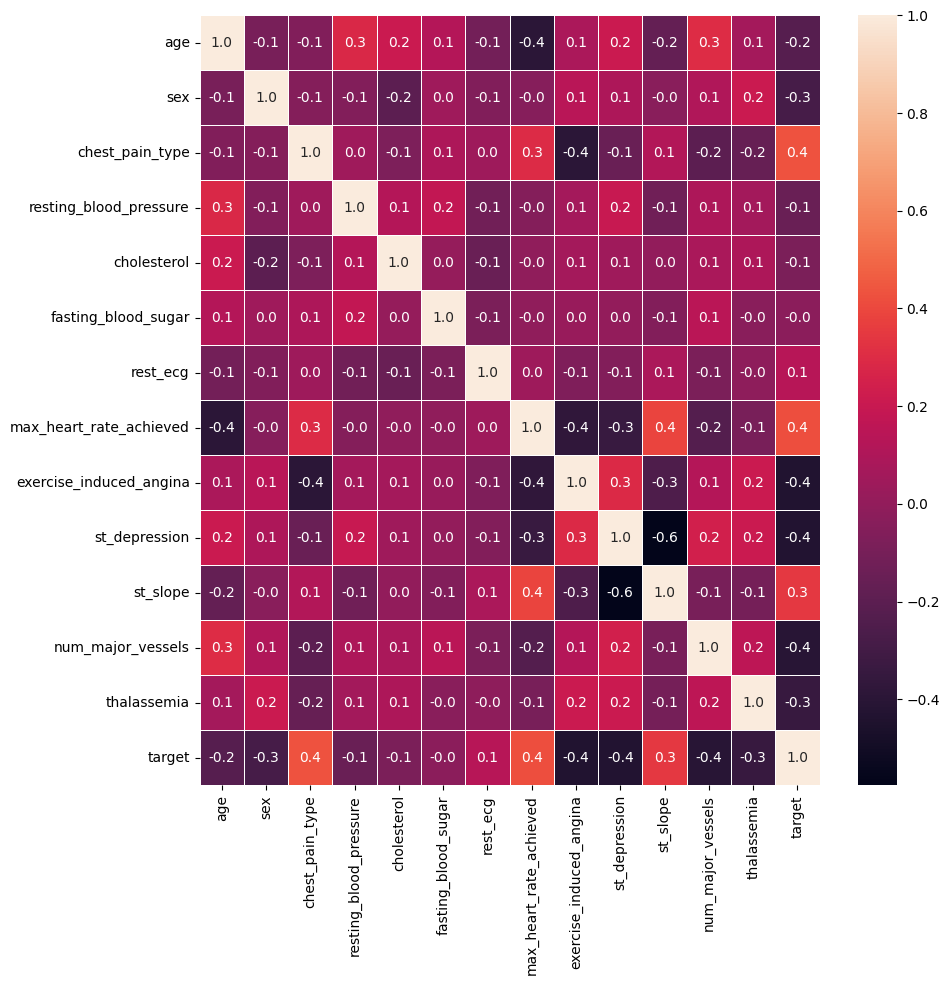

In [21]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

<Axes: xlabel='Count', ylabel='resting_blood_pressure'>

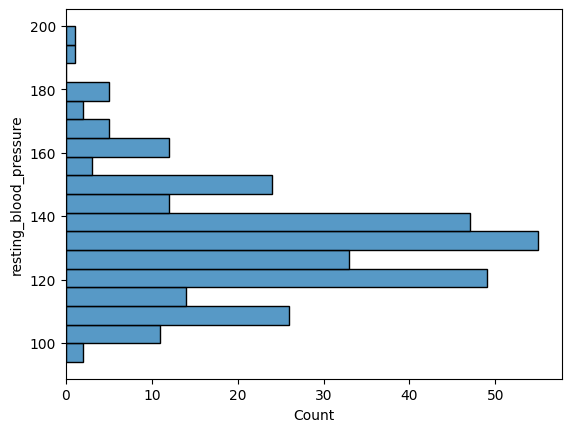

In [22]:
sns.histplot(y='resting_blood_pressure',data=df)

<Axes: xlabel='Count', ylabel='cholesterol'>

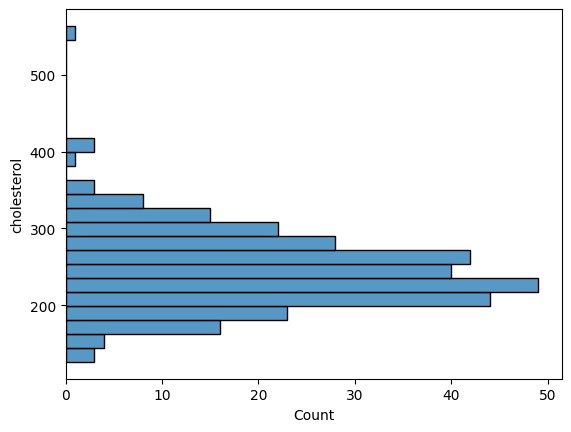

In [23]:

sns.histplot(y='cholesterol',data=df)

<Axes: xlabel='Count', ylabel='max_heart_rate_achieved'>

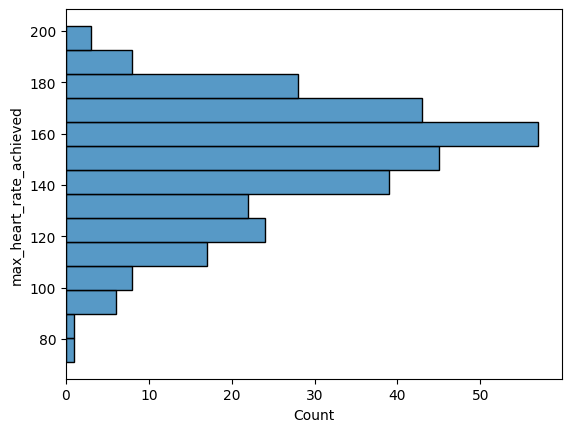

In [24]:
sns.histplot(y='max_heart_rate_achieved',data=df)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1),
                                                    df['target'], test_size = 0.30, random_state=42)

In [26]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [27]:
y_predict = model.predict(X_test)

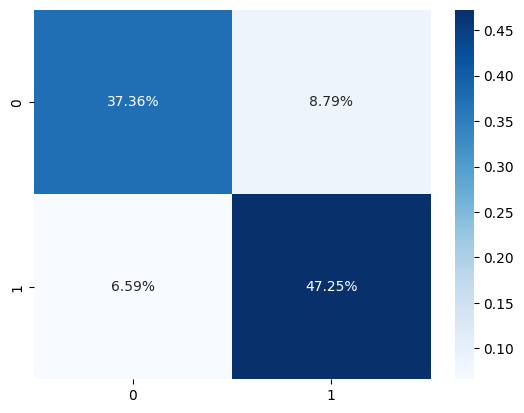

Accuracy is:  84.61538461538461


In [28]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)


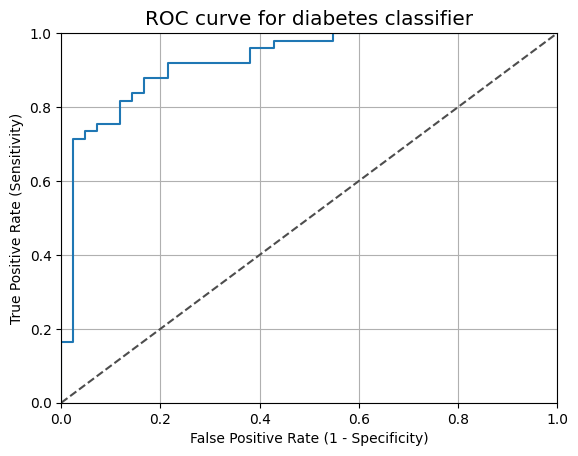

In [29]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [30]:

auc(fpr, tpr)

0.923226433430515